# Caminos Más Cortos

En este caso, queremos representar las intersecciones de los caminos de una ciudad mediante vértices de un multi-grafo dirigido ponderado. La ponderación o peso de la arista corresponde al largo del segmento, por lo tanto podemos utilizar el algoritmo Dijsktra para calcular el costo de un camino entre dos puntos. 

In [1]:
!pip install haversine
!pip install osmnx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 95 kB 5.3 MB/s 
     |████████████████████████████████| 6.3 MB 55.0 MB/s 
     |████████████████████████████████| 1.0 MB 70.8 MB/s 
     |████████████████████████████████| 11.2 MB 53.9 MB/s 
     |████████████████████████████████| 1.0 MB 44.3 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
     |████████████████████████████████| 16.7 MB 7.0 MB/s 
     |████████████████████████████████| 930 kB 24.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. Th

<Figure size 432x288 with 0 Axes>

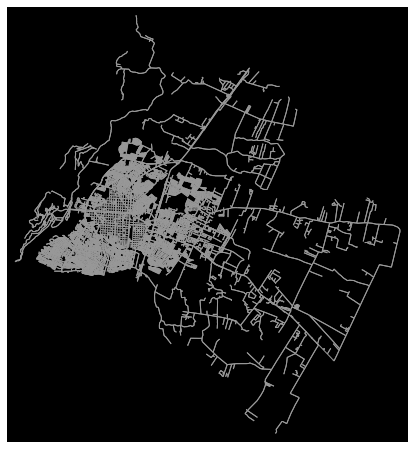

In [75]:
import osmnx as ox
import networkx as nx
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

ox.config(log_file=True, log_console=True, use_cache=True)
G=ox.graph_from_place('Talca,Chile',network_type='all', simplify=True)
#ox.save_graphml(G, filename='talca_ciclovias.graphml')
plt.figure()
ox.plot_graph(ox.project_graph(G),node_size=0, bgcolor='k')
plt.show()




In [78]:
for e in G.edges(data=True):
  break

In [84]:
e[2].keys()

dict_keys(['osmid', 'oneway', 'lanes', 'highway', 'maxspeed', 'length'])

In [21]:
nx.is_weakly_connected(G)

True

In [22]:
stats=ox.basic_stats(G)
df=pd.DataFrame(pd.Series(stats)).T
display(df.T) 

0
n                                                                         11462
m                                                                         30346
k_avg                                                                  5.295062
edge_length_total                                                   2330480.412
edge_length_avg                                                       76.796956
streets_per_node_avg                                                   2.906997
streets_per_node_counts       {0: 0, 1: 1682, 2: 33, 3: 7470, 4: 2228, 5: 44...
streets_per_node_proportions  {0: 0.0, 1: 0.14674576862676672, 2: 0.00287907...
intersection_count                                                         9780
street_length_total                                                 1277461.611
street_segment_count                                                      16645
street_length_avg                                                     76.747468
circuity_avg                                                                1.0
self_loop_proportion                                                   0.002704

In [58]:
G=G.to_undirected()

In [86]:
G.edges(data=True)

OutMultiEdgeDataView([(268893035, 1172702645, {'osmid': 83188768, 'oneway': True, 'lanes': '1', 'highway': 'motorway_link', 'maxspeed': '40', 'length': 19.977}), (268893035, 6597701437, {'osmid': 702571694, 'oneway': True, 'lanes': '2', 'ref': '5', 'name': 'Ruta 5 Sur', 'highway': 'motorway', 'maxspeed': '120', 'length': 135.663}), (314255271, 5991033068, {'osmid': 480762823, 'lanes': '2', 'ref': 'K-55', 'name': 'Cruce Ruta 115 CH (San Miguel) - Cruce K-15 (Punta de Diamante)', 'highway': 'primary', 'maxspeed': '60', 'oneway': False, 'length': 130.495}), (314255271, 5991036225, {'osmid': 480762823, 'lanes': '2', 'ref': 'K-55', 'name': 'Cruce Ruta 115 CH (San Miguel) - Cruce K-15 (Punta de Diamante)', 'highway': 'primary', 'maxspeed': '60', 'oneway': False, 'length': 44.132999999999996, 'geometry': <shapely.geometry.linestring.LineString object at 0x7fd58f00c210>}), (314255271, 5991036230, {'osmid': 634987053, 'oneway': True, 'highway': 'residential', 'length': 131.399, 'geometry': <sha

In [74]:
origin_point = (-35.434415,-71.620053)
destination_point = (-35.425901, -71.666645)
orig=ox.distance.nearest_nodes(G, origin_point[1],origin_point[0])
dest=ox.distance.nearest_nodes(G,destination_point[1],destination_point[0])

print('Inicio : ',G.nodes[orig])
print('Destino : ',G.nodes[dest])

Inicio :  {'y': -35.4344252, 'x': -71.6200944, 'street_count': 3}
Destino :  {'y': -35.4259081, 'x': -71.6666469, 'highway': 'traffic_signals', 'street_count': 5}


In [73]:
G = ox.add_edge_speeds(G)
G = ox.add_edge_travel_times(G)

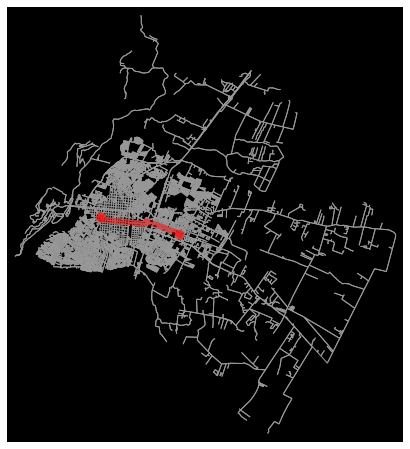

In [88]:
route = nx.shortest_path(G, orig, dest, weight='length')
fig, ax = ox.plot_graph_route(G, route, route_linewidth=6, node_size=0, bgcolor='k')

In [89]:
print('Largo del camino : ',nx.shortest_path_length(G,source=orig,target=dest,weight='length'))

Largo del camino :  4642.225000000001


In [91]:
import numpy as np
from heapq import heappush,heappop

class abstract_graph:
    
    def __init__(self,_edges):
        self.edges=_edges
        self.nodes={u for u,v in self.edges} | {v for u,v in self.edges}
        
    def adjacency_matrix(self):
        pass
    
    def adjacency_list(self):
        pass

    
class weighted_graph(abstract_graph):
    
    def __init__(self,_edges):
        self.edges=_edges
        self.nodes={u for u,v in self.edges.keys()} | {v for u,v in self.edges.keys()}
        
    def adjacency_matrix(self):
        n=len(self.nodes)
        mat=np.zeros((n,n))
        adjacent=lambda x : [1 if x==v else 0 for (u,v) in enumerate(sorted(list(G.nodes))) ]
        L=self.adjacency_list()
        i=0
        for v in sorted(list(G.nodes)):
            for l in L[v]:
                mat[i,]+=adjacent(l)
            i=i+1
        return mat
    
    def adjacency_list(self):
        adjacent=lambda n : {v for u,v in self.edges.keys() if u==n } | {u for u,v in self.edges if v==n}
        return {v:adjacent(v) for v in self.nodes}

def dijkstra(G,start):
    if start not in G.nodes:
        return None
    neighbors=G.adjacency_list()
    path={}    
    path.update({start:None})
    distance={}
    distance.update({start:0})
    frontier=[]
    heappush(frontier,(0,start))
    while frontier:
      dist_u,u=heappop(frontier)
      for v in neighbors[u]:
        if (u,v) in G.edges:
          dist_v=dist_u+G.edges[(u,v)]
        else:
          dist_v=dist_u+G.edges[(v,u)]
        if v not in distance.keys() or dist_v<distance[v]:
          path.update({v:u})
          distance.update({v:dist_v})
          heappush(frontier,(dist_v,v))
    return path,distance

In [95]:
import haversine as hs
from haversine import Unit

data=G.nodes.data()
length = lambda u,v : hs.haversine((data[u]['y'],data[u]['x']),(data[v]['y'],data[v]['x']),
                                   unit=Unit.METERS)
E={(u,v):length(u,v) for u,v,w in G.edges}

In [96]:
G_2=weighted_graph(E)
parent,route_2=dijkstra(G_2,orig)

In [97]:
def tree_path(parent,end):
    path=[end]
    k=end
    while k is not None:
        path.append(parent[k])
        k=parent[k]
    return path[:-1][::-1]

In [99]:
route_2=tree_path(parent,dest)

In [100]:
route_2[:10]

[8794257888,
 5563329329,
 5260740125,
 8794257890,
 8794257879,
 5655173237,
 5673909397,
 535765100,
 775939560,
 2049946733]

In [101]:
route[:10]

[8794257888,
 5563329329,
 5260740125,
 8794257890,
 5563329352,
 3797678511,
 535765100,
 775939560,
 2049946733,
 1172866636]